<a href="https://colab.research.google.com/github/aboltCD/aboltCD/blob/main/K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering con K-Means

En este notebook realizaremos funciones de clustering de datos utilizando el dataset de fisher (Iris). Primero comenzamos importando las librerías necesarias

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.datasets import load_iris

Gardamos los cuatro features originales del dataset (en este caso haremos clustering, por lo que el target no se usará)

In [27]:
iris = load_iris()
X = iris.data

Ahora agrupamos estos datos utilizando k-Means. Sin embargo, no sabemos que k elegir, por lo que debemos hacer esto con varios valores de k. En este caso probaremos con k desde 1 hasta 11:

In [28]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
resultados = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    resultados.append(kmeans.inertia_)

# Using the elbow method to determine the optimal number of clusters for k-means clustering


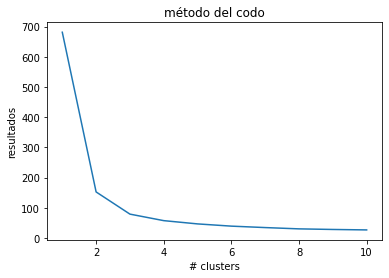

In [29]:
plt.plot(range(1, 11), resultados)
plt.title('método del codo')
plt.xlabel('# clusters')
plt.ylabel('resultados')
plt.show()

En este caso, el mejor número de clústeres es 3 (la ganancia posterior a 3 clústeres es marginal)


#Visualizando K-Means Clustering

Ahora que elegimos el mejor k, podemos visualizar nuestro clústering. Primero creamos nuestro modelo de clústering:

In [30]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

Y ahora lo visualizamos con respecto a dos variables. Es importante recordar incluir los centroides en la visualización. El científico debe darle una interpretación a cáda clúster. En este caso, se relaciona a cada especie:

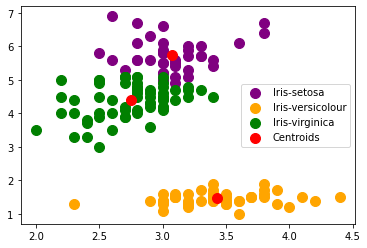

In [31]:
#Visualising the clusters
plt.scatter(X[y_kmeans == 0, 1], X[y_kmeans == 0, 2], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 1], X[y_kmeans == 1, 2], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 1], X[y_kmeans == 2, 2], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:,2], s = 100, c = 'red', label = 'Centroids')

plt.legend()

Y en 3D:

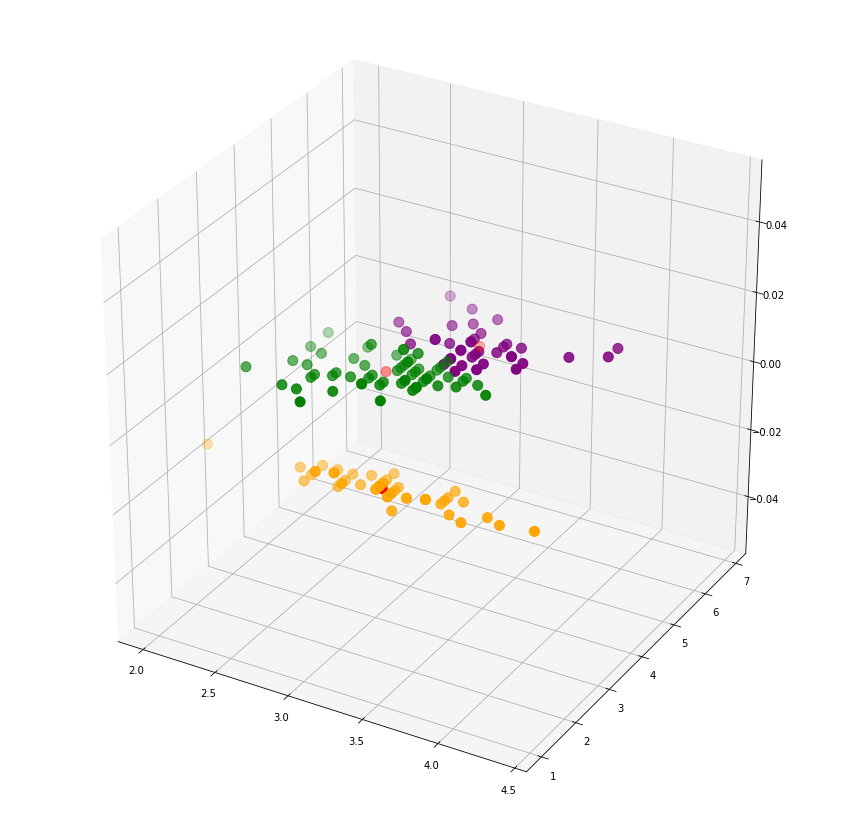

In [32]:
# 3d scatterplot using matplotlib
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(X[y_kmeans == 0, 1], X[y_kmeans == 0, 2], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 1], X[y_kmeans == 1, 2], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 1], X[y_kmeans == 2, 2], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:,2], s = 100, c = 'red', label = 'Centroids')
plt.show()